In [63]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('CarPricesDataNumeric.pkl')
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [64]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 11)
(999, 1)
(429, 11)
(429, 1)


In [66]:
# Standardized predictors
X[0:3]

array([[-1.79400224, -0.58190964, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.79400224,  0.11238127, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.73978236, -0.72303656, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675]])

In [67]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[   23., 46986.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   23., 72937.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   24., 41711.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.]])

# Regression using Deep Learning- Artificial Neural Networks(ANN)

In [68]:
from keras.models import Sequential
from keras.layers import Dense

In [69]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))


# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [70]:
# Fitting the ANN to the Training set
#1000/20 --- forward/backward
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
999/999 [==============================] - 5s 5ms/step - loss: 1.0220
Epoch 2/50
999/999 [==============================] - 0s 487us/step - loss: 0.9529
Epoch 3/50
999/999 [==============================] - 1s 558us/step - loss: 0.7355
Epoch 4/50
999/999 [==============================] - 1s 602us/step - loss: 0.4762
Epoch 5/50
999/999 [==============================] - 1s 593us/step - loss: 0.3125
Epoch 6/50
999/999 [==============================] - 1s 543us/step - loss: 0.2374
Epoch 7/50
999/999 [==============================] - 1s 602us/step - loss: 0.1964 0s - loss
Epoch 8/50
999/999 [==============================] - 1s 585us/step - loss: 0.1714
Epoch 9/50
999/999 [==============================] - 1s 569us/step - loss: 0.1563 0s - los
Epoch 10/50
999/999 [==============================] - 1s 513us/step - loss: 0.1465
Epoch 11/50
999/999 [==============================] - 0s 472us/step - loss: 0.1412
Epoch 12/50
999/999 [==============================] - 0s 481us/step

# Finding best set of parameters using manual grid search

In [71]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, input_dim=20, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = 10, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [72]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 82.72656924069275
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 78.74907303908995
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 78.92280913991384
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 81.64888015322423
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 77.34253691939816
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 78.9927227950354
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 78.10293716754748
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 78.13029941917682
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 76.02403965877997
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 78.2984791310606
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 77.19526157607554
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 78.19416655746379
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 73.73941185218938
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 72.1588938286892
15 Parameters: batch_si

C:\Users\SAYAN\anaconda0\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Parameters'>

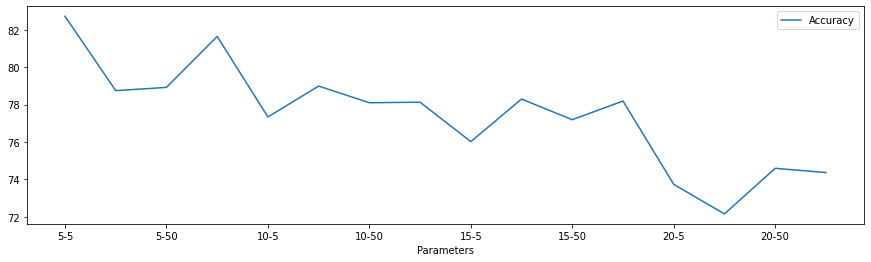

In [73]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [74]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 5, verbose=0)

In [76]:
# Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,16812.841797
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,7863.892578
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,10750.361328
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,12757.428711
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9312.664062


In [77]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
CarPricesDataNumeric[CarPricesDataNumeric['KM']==89520]

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
1197,8950,76.0,89520,110,1,0,1600.0,3,1050.0,0,0,1


In [78]:
APE=100* (abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head(18)

The Accuracy of ANN model is: 92.07068653583799


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,16812.841797,1.896011
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,7863.892578,12.135278
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,10750.361328,10.038817
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,12757.428711,0.491758
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9312.664062,4.636675
5,68.0,104299.0,110.0,1.0,0.0,1600.0,5.0,1085.0,0.0,0.0,1.0,8495.0,8639.937500,1.706151
6,67.0,79762.0,86.0,1.0,0.0,1300.0,3.0,1015.0,0.0,0.0,1.0,9130.0,8256.042969,9.572366
7,54.0,47768.0,110.0,0.0,0.0,1600.0,3.0,1055.0,0.0,0.0,1.0,10850.0,10543.637695,2.823616
8,28.0,29206.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,15950.0,15825.493164,0.780607
9,50.0,39706.0,110.0,1.0,0.0,1600.0,5.0,1080.0,0.0,0.0,1.0,13500.0,11556.009766,14.399928


In [79]:
# Printing top 10 errors made by model
TestingData.sort_values(by='APE', ascending=False).head(10)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
295,44.0,131273.0,69.0,1.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4750.0,9305.798828,95.911554
242,74.0,203254.0,72.0,1.0,0.0,2000.0,3.0,1135.0,0.0,1.0,0.0,4400.0,6052.607910,37.559271
16,44.0,71793.0,110.0,1.0,0.0,1600.0,4.0,1067.0,1.0,0.0,0.0,14950.0,9425.260742,36.954778
143,58.0,69022.0,86.0,1.0,0.0,1300.0,5.0,1035.0,0.0,0.0,1.0,6950.0,9393.787109,35.162404
192,67.0,58058.0,110.0,1.0,0.0,1600.0,3.0,1065.0,0.0,0.0,1.0,12950.0,9173.600586,29.161385
256,72.0,105856.0,86.0,0.0,0.0,1300.0,3.0,1015.0,0.0,0.0,1.0,5950.0,7667.109863,28.858989
268,69.0,58952.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,6900.0,8869.152344,28.538440
180,71.0,134660.0,72.0,0.0,0.0,2000.0,5.0,1135.0,0.0,1.0,0.0,5950.0,7592.824707,27.610499
334,71.0,64000.0,110.0,1.0,0.0,1600.0,5.0,1070.0,0.0,0.0,1.0,6999.0,8868.553711,26.711726
398,68.0,204250.0,72.0,0.0,0.0,2000.0,3.0,1115.0,0.0,1.0,0.0,7900.0,5811.849609,26.432283


<AxesSubplot:>

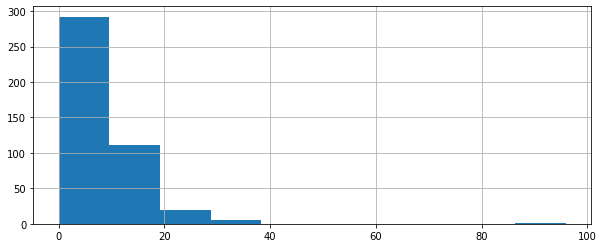

In [80]:
# Looking at the distribution is errors
%matplotlib inline
TestingData['APE'].hist(figsize=(10,4))

<AxesSubplot:>

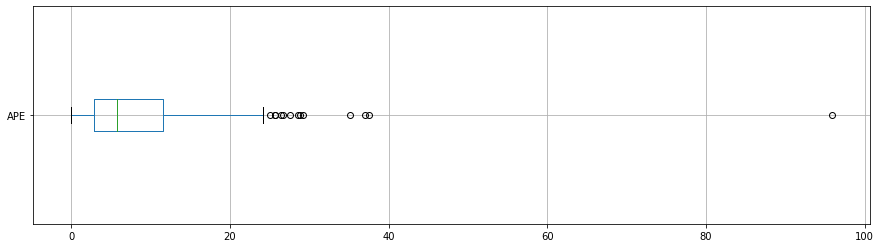

In [81]:
TestingData.boxplot(column='APE', figsize=(15,4), vert=False)

# Sklearn GridSearchCV

In [82]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [83]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }


RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [84]:
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [85]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, param_grid=Parameter_Trials, scoring=custom_Scoring, cv=5)

In [86]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/10
1142/1142 [==============================] - 9s 8ms/step - loss: 0.3194A: 3s - loss
Epoch 2/10
1142/1142 [==============================] - 1s 1ms/step - loss: 0.1278
Epoch 3/10
1142/1142 [==============================] - 1s 1ms/step - loss: 0.0975A:
Epoch 4/10
1142/1142 [==============================] - 1s 1ms/step - loss: 0.0897
Epoch 5/10
1142/1142 [==============================] - 1s 1ms/step - loss: 0.0859
Epoch 6/10
1142/1142 [==============================] - 1s 1ms/step - loss: 0.0848
Epoch 7/10
1142/1142 [==============================] - 1s 1ms/step - loss: 0.0842
Epoch 8/10
1142/1142 [==============================] - 2s 1ms/step - loss: 0.0832
Epoch 9/10
1142/1142 [==============================] - 2s 1ms/step - loss: 0.0829
Epoch 10/10
1142/1142 [==============================] - 2s 1ms/step - loss: 0.0824
###################################################################### Accuracy: 20.21612585939947
Epoch 1/10
1142/1142 [==============================] - 

In [87]:
grid_search.best_params_

{'Optimizer_trial': 'rmsprop', 'batch_size': 10, 'epochs': 10}